# Aufgabe 6

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Datensatz laden
df = pd.read_csv('auto.csv')

In [3]:
# Informationen zum Datensatz anzeigen, um die Datentypen zu identifizieren
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# Bereich (Minimum und Maximum) für jede quantitative Variable berechnen
quantitative_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

In [6]:
for column in quantitative_columns:
    print(f"Bereich von {column}: {df[column].min()} bis {df[column].max()}")

Bereich von mpg: 9.0 bis 46.6
Bereich von displacement: 68.0 bis 455.0
Bereich von horsepower: 46 bis 230
Bereich von weight: 1613 bis 5140
Bereich von acceleration: 8.0 bis 24.8


In [7]:
# Mittelwert und Standardabweichung für jede quantitative Variable berechnen
for column in quantitative_columns:
    print(f"Mittelwert von {column}: {round(df[column].mean(), 2)}")
    print(f"Standardabweichung von {column}: {round(df[column].std(), 2)}")

Mittelwert von mpg: 23.45
Standardabweichung von mpg: 7.81
Mittelwert von displacement: 194.41
Standardabweichung von displacement: 104.64
Mittelwert von horsepower: 104.47
Standardabweichung von horsepower: 38.49
Mittelwert von weight: 2977.58
Standardabweichung von weight: 849.4
Mittelwert von acceleration: 15.54
Standardabweichung von acceleration: 2.76


In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# Entfernen der Beobachtungen von Index 11 bis 80
df_reduced = df.drop(df.index[10:80])

In [10]:
# Neue Statistiken berechnen
for column in quantitative_columns:
    print(f"Neuer Bereich von {column}: {df_reduced[column].min()} bis {df_reduced[column].max()}")
    print(f"Neuer Mittelwert von {column}: {df_reduced[column].mean()}")
    print(f"Neue Standardabweichung von {column}: {df_reduced[column].std()}")

Neuer Bereich von mpg: 11.0 bis 46.6
Neuer Mittelwert von mpg: 24.36583850931677
Neue Standardabweichung von mpg: 7.843731593264316
Neuer Bereich von displacement: 68.0 bis 455.0
Neuer Mittelwert von displacement: 187.32919254658384
Neue Standardabweichung von displacement: 100.2511038245344
Neuer Bereich von horsepower: 46 bis 230
Neuer Mittelwert von horsepower: 101.08695652173913
Neue Standardabweichung von horsepower: 35.99020138444362
Neuer Bereich von weight: 1649 bis 4997
Neuer Mittelwert von weight: 2934.083850931677
Neue Standardabweichung von weight: 811.5680809127866
Neuer Bereich von acceleration: 8.5 bis 24.8
Neuer Mittelwert von acceleration: 15.696273291925468
Neue Standardabweichung von acceleration: 2.705305464668653


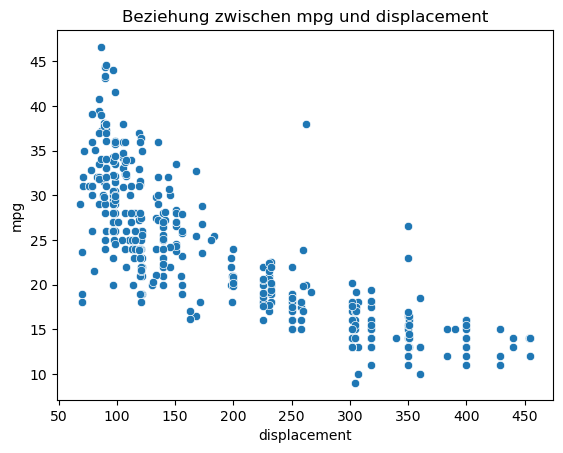

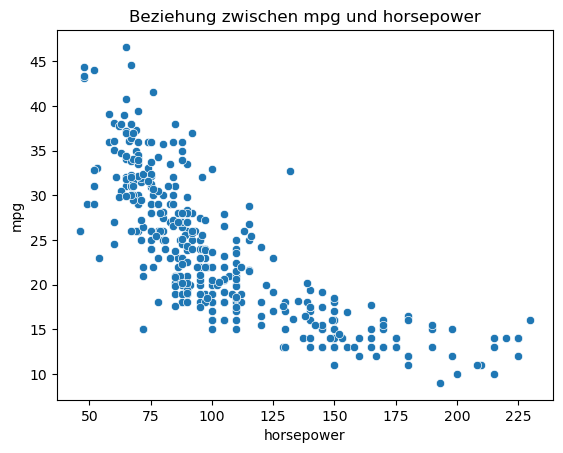

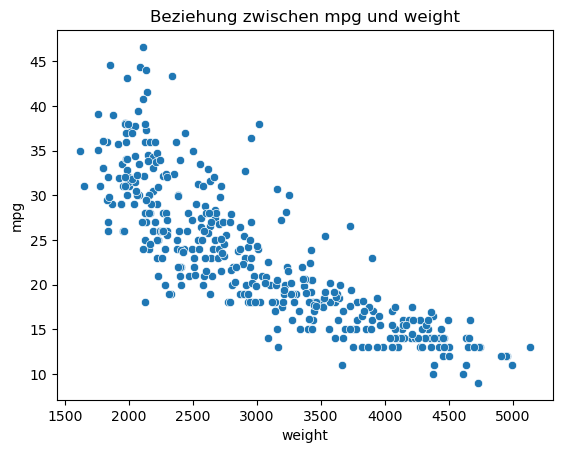

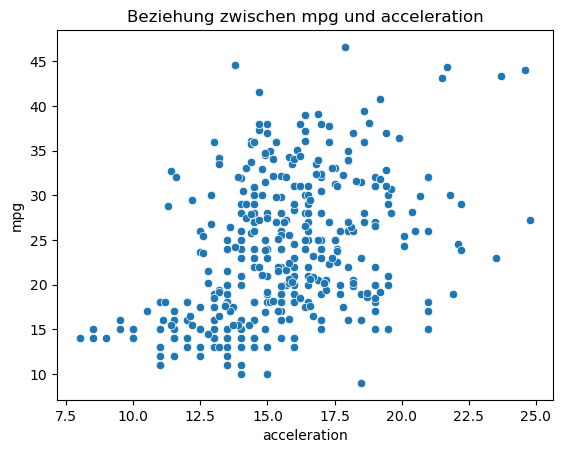

In [11]:
# Streudiagramme für die Beziehungen zwischen 'mpg' und anderen quantitativen Variablen
for column in quantitative_columns:
    if column != 'mpg':
        sns.scatterplot(x=column, y='mpg', data=df)
        plt.title(f'Beziehung zwischen mpg und {column}')
        plt.show()

# Aufgabe 5

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis
import scipy.stats as stats

In [15]:
# Daten laden
#df = pd.read_csv('Einkommen.csv')
df = pd.read_csv('auto.csv')

In [16]:
# Deskriptive Statistiken
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

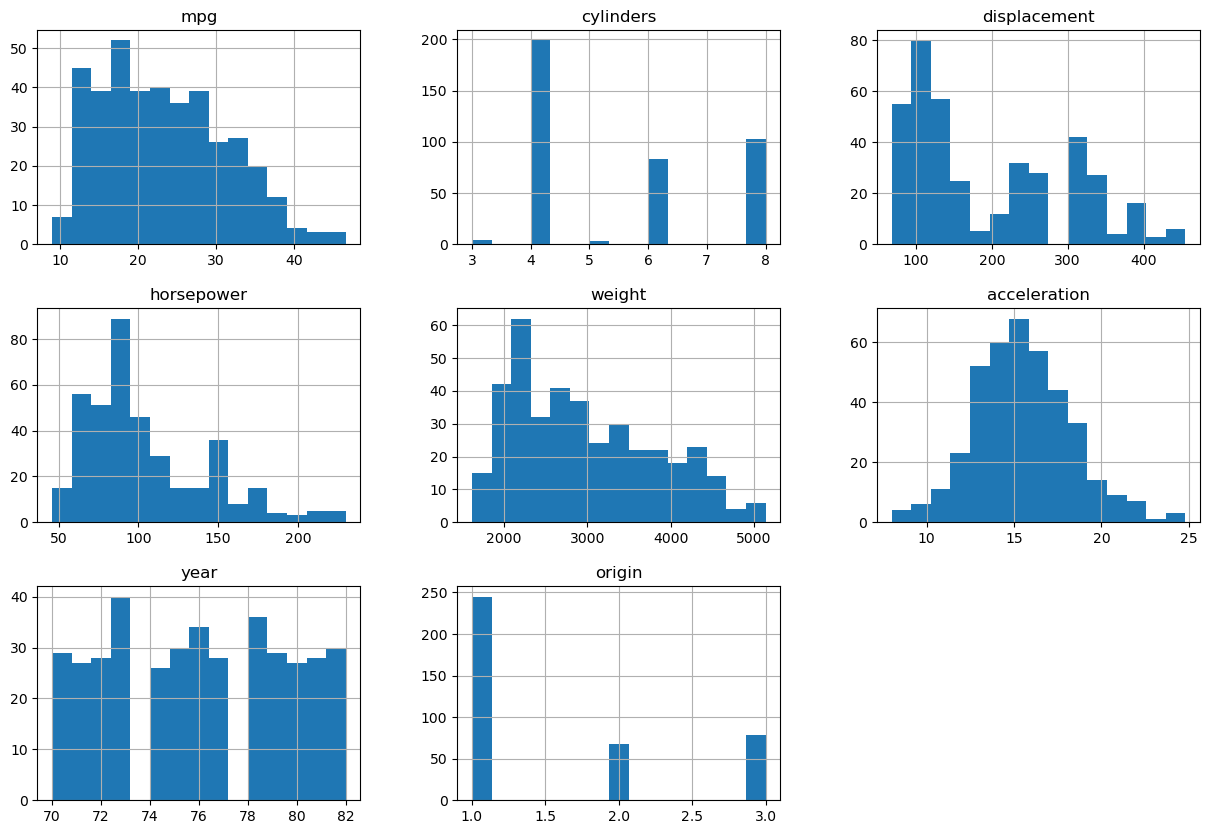

In [17]:
# Histogramme für alle numerischen Variablen
df.hist(bins=15, figsize=(15, 10))
plt.show()

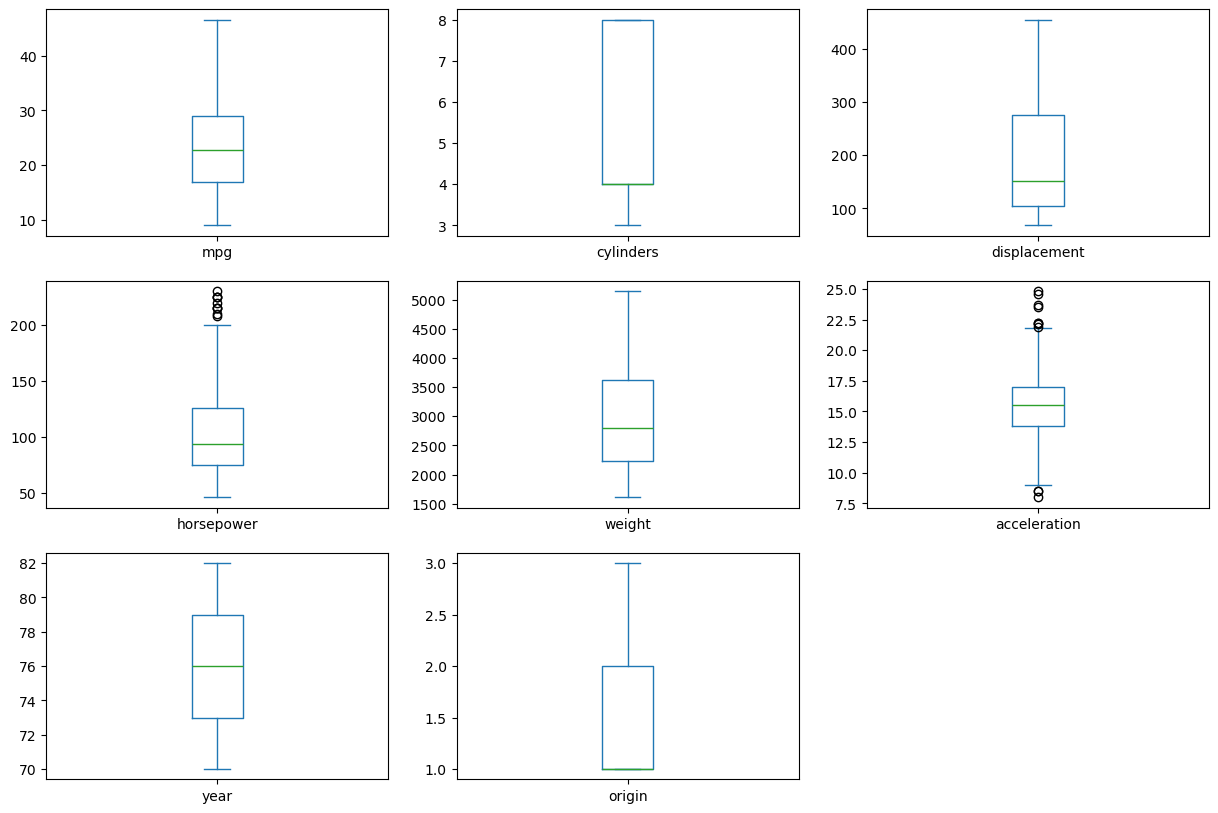

In [20]:
# Boxplots für alle numerischen Variablen
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 10))
plt.show()

In [21]:
# Shapiro-Wilk-Test
stat, p = shapiro(df['mpg'])
print('Shapiro-Wilk Test p-Wert:', p)

Shapiro-Wilk Test p-Wert: 1.0494407063380879e-07


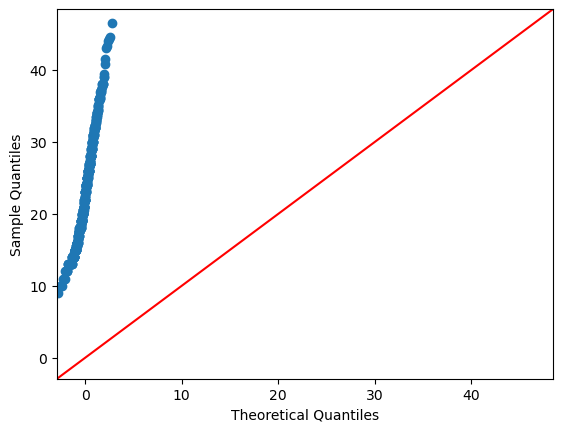

In [22]:
# Q-Q-Plot
sm.qqplot(df['mpg'], line ='45')
pylab.show()

In [31]:
# Schiefe und Kurtosis für 'mpg'
mpg_skewness = skew(df['mpg'])
mpg_kurtosis = kurtosis(df['mpg'])

print(f"Schiefe von mpg: {mpg_skewness}")
print(f"Kurtosis von mpg: {mpg_kurtosis}")

Schiefe von mpg: 0.45534138282810366
Kurtosis von mpg: -0.52470258338766


In [27]:
# Gruppieren der Daten nach Zylindern
groups = df.groupby('cylinders')['mpg']

In [28]:
# ANOVA
fvalue, pvalue = stats.f_oneway(*[group[1] for group in groups])
print('ANOVA p-Wert:', pvalue)

ANOVA p-Wert: 8.785541055264391e-85


In [29]:
# t-Test zwischen Autos mit 4 und 6 Zylindern
t_stat, p_val = stats.ttest_ind(df[df['cylinders'] == 4]['mpg'], df[df['cylinders'] == 6]['mpg'])
print('t-Test p-Wert:', p_val)

t-Test p-Wert: 4.617651634899658e-33
